---Survival Rate---
Sex     AgeGroup
female  0-10        0.633333
        10-20       0.755556
        20-30       0.722222
        30-40       0.833333
        40-50       0.687500
        50-60       0.888889
        60-70       1.000000
        70-80            NaN
        80-90            NaN
male    0-10        0.593750
        10-20       0.122807
        20-30       0.168919
        30-40       0.214953
        40-50       0.210526
        50-60       0.133333
        60-70       0.133333
        70-80       0.000000
        80-90       1.000000
Name: Survived, dtype: float64
Sex         female      male
AgeGroup                    
0-10      0.633333  0.593750
10-20     0.755556  0.122807
20-30     0.722222  0.168919
30-40     0.833333  0.214953
40-50     0.687500  0.210526
50-60     0.888889  0.133333
60-70     1.000000  0.133333
70-80          NaN  0.000000
80-90          NaN  1.000000
---Survival Rate---
Sex     AgeGroup
female  0-10        19.0
        10-20       34.0
    

<AxesSubplot:xlabel='AgeGroup'>

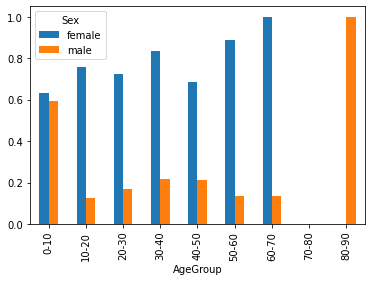

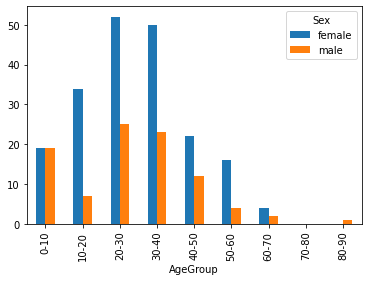

In [52]:
import pandas as pd
pandas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df = pandas.read_csv('train.csv')

len(df[(df.Sex=='female') & (df.Age>=40) & (df.Survived==1)])/len(df[(df.Sex=='female') & (df.Survived==1)])
(len(df[(df.Sex=='female') & (df.Age>=40) & (df.Survived==1)])/(len(df[(df.Sex=='female') & (df.Age>=40)])))

bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] 
labels= ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'] 
df['AgeGroup'] = pandas.cut(df['Age'], bins=bins, labels=labels, right=False)  

SVR_SX_AG = df.groupby(['Sex','AgeGroup'])['Survived'].mean()
print("---Survival Rate---")
print(SVR_SX_AG)
graph01 = SVR_SX_AG.unstack().transpose()
print(graph01)
graph01.plot.bar()

SVR_SX_SM = df.groupby(['Sex','AgeGroup'])['Survived'].sum()
print("---Survival Rate---")
print(SVR_SX_SM)
graph02 = SVR_SX_SM.unstack().transpose()
print(graph02)
graph02.plot.bar()

In [30]:
df.info()  # info about dataframe
df.head()  # give first couple rows of data
df.describe()  # give statistics about data
df[:10] # Like in regular Python you can get to the Item by Index, this shows XX rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 67.3+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-40
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0-10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10-20


In [31]:
df.describe()  # give statistics about data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
print("Number of Passengers: ", len(df))
print("Number of Deaths:     ",sum(df.Survived==0))
print("Number of Survivors:  ", sum(df.Survived==1))

Number of Passengers:  891
Number of Deaths:      549
Number of Survivors:   342


array([<AxesSubplot:title={'center':'(0, female)'}>,
       <AxesSubplot:title={'center':'(0, male)'}>,
       <AxesSubplot:title={'center':'(1, female)'}>,
       <AxesSubplot:title={'center':'(1, male)'}>], dtype=object)

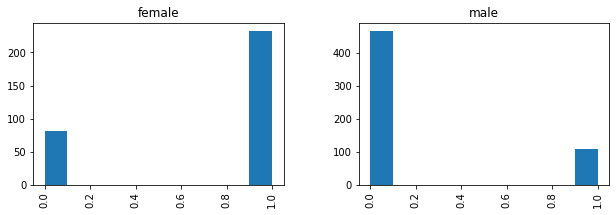

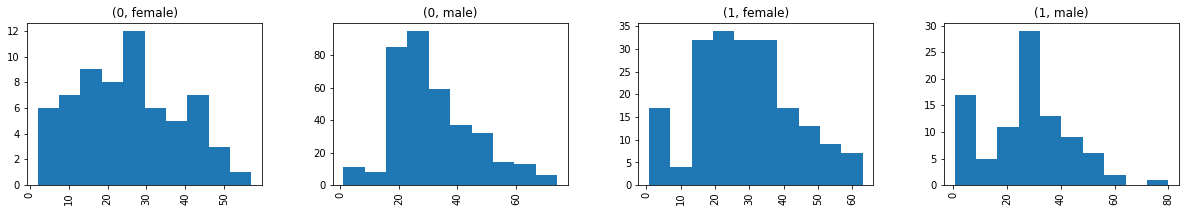

In [33]:
#Visualize the data
df.hist("Survived", by="Sex",figsize = [10,3])
df.hist("Age", bins=10, by = ["Survived", "Sex"], layout=[1,4],figsize = [20,3])

In [34]:
SVS_SX_AG.describe()

count    16.000000
mean     18.125000
std      16.227035
min       0.000000
25%       4.000000
50%      17.500000
75%      23.500000
max      52.000000
Name: Survived, dtype: float64

In [35]:
SVS_SX_AG.head()

Sex     AgeGroup
female  0-10        19.0
        10-20       34.0
        20-30       52.0
        30-40       50.0
        40-50       22.0
Name: Survived, dtype: float64

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

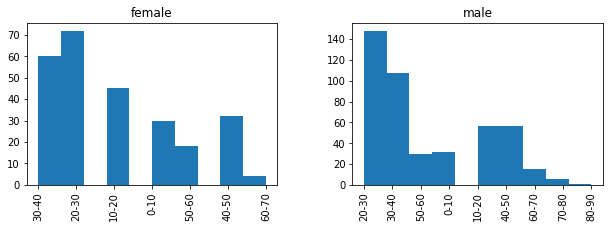

In [36]:
df.hist("AgeGroup", by="Sex",figsize = [10,3])

In [43]:
def get_counts(dataframe, factor, quality, status):
    '''
    dataframe - the dataframe on which to apply the function (e.g. 'df' for the Titanic dataframe)
    factor - the column on which to perform the analysis (e.g. 'Pclass' for the ticket class)
    quality - the quality on which to perform the analysis (e.g '3' for the third class)
    status - the status you want to count: survival or death. Should be a Boolean (1 for survival, 0 for death).
    '''
    target = dataframe[factor].where(dataframe[factor] == quality)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count

female_survival_count = get_counts(df, 'Sex', 'female', 1)
male_survival_count = get_counts(df, 'Sex', 'male', 1)
female_death_count = get_counts(df, 'Sex', 'female', 0)
male_death_count = get_counts(df, 'Sex', 'male', 0)

print('SURVIVAL COUNT BY GENDER')
print('Female survival count: ', female_survival_count)
print('Male survival count: ', male_survival_count)
print('\nCASUALTIES COUNT BY GENDER')
print('Female death count: ', female_death_count)
print('Male death count: ', male_death_count)



SURVIVAL COUNT BY GENDER
Female survival count:  233
Male survival count:  109

CASUALTIES COUNT BY GENDER
Female death count:  81
Male death count:  468
